## Neural Network from scratch

In [1]:
import numpy as np
np.random.seed(1)

In this notebook we are going to build a feed forward neural network (NN) from scratch, i.e., using numpy. This will allow us to understand the basic principles of NN, some of its problems and solutions to them.

We are going to do that à la Keras, this is, using classes for each type of layer. You can think this is overkilling, but the structure of Object Orienting Programming (OOP) really fits our requirements for our task: to have objects (layers) with parameters in memory (weights), and we want to apply functions with these parameters (forward pass and predict) and also to update them (backward pass / train).

A simple guide to OOP in Python 3 can be found [here](https://realpython.com/python3-object-oriented-programming/).

## Class example

A simple example of a class, which is a circle, is the following

In [2]:
# In Python 3 both ways of defyning a class are equivalent
# class Circle(object): 
class Circle():
    # __init__ is only applied when defining an object of the class
    def __init__(self, radius):
        self.radius = radius
        self.perimeter = 2* np.pi * self.radius
    def set_radius(self, radius):
        self.radius = radius
        # NOTE THAT WE ARE NOT UPDATING PERIMETER
    def area(self):
        return np.pi*self.radius**2
    def print_perimeter(self):
        print('The perimeter is',self.perimeter)
        return None

In [3]:
# We create an object of the class Circle
circle_obj = Circle(3)
# Let's check what circle_obj is
print('Check circle_obj and its type')
print(circle_obj)
print(type(circle_obj))

# We can use its methods
print('\nWe use its methods, like area() and print_perimeter()')
print(circle_obj.area())
circle_obj.print_perimeter()

# We can access to its object variables
print('\nWe directly access to its variables, like perimeter')
print(circle_obj.perimeter)

# We can change its variables though methods. Remember that this changes the radius, but not the perimeter
print('\nNow we set the object variable radius to one')
circle_obj.set_radius(1)
print(circle_obj.radius)
print('But the variable perimeter has not change')
circle_obj.print_perimeter()

# Area only uses the variable radius, which has been updated
print('\nWe can use the method area() to print the area')
print(circle_obj.area())

# But we can direcly change the value of perimeter without changing radius
print('\nNow we set the value of the perimeter to -1')
circle_obj.perimeter = -1.
circle_obj.print_perimeter()
print('\nIT IS CLEAR THAT THIS IS NOT A CONSISTENT WAY FOR DEFYNING THIS CLASS')

Check circle_obj and its type
<class '__main__.Circle'>

We use its methods, like area() and print_perimeter()
28.274333882308138
The perimeter is 18.84955592153876

We directly access to its variables, like perimeter
18.84955592153876

Now we set the object variable radius to one
1
But the variable perimeter has not change
The perimeter is 18.84955592153876

We can use the method area() to print the area
3.141592653589793

Now we set the value of the perimeter to -1
The perimeter is -1.0

IT IS CLEAR THAT THIS IS NOT A CONSISTENT WAY FOR DEFYNING THIS CLASS


## Backpropagation algorithm (theory)

Let us start defying the shapes of our data structures. For example, the features and targets of out dataset:
$$ X = (M, n_0)\;\;\textrm{and} \;\; Y = (M, n_C) \;,$$
where $M$ is the number of items (it does not have no coincide with the length of the dataset if we are working with batches), $n_0$ is the number of features of our inputs and $n_C$ the number of classes, since we are going to use one-hot encoding.

The dense layer has a matrix of weights $W$ and the vector of biases $b$, if it has $n_0$ input features and $n_1$ output features, the shape of them is
$$W = (n_0,n_1)\;\;\textrm{and} \;\; b = (n_1).$$

#### Forward

The operation of a dense layer, applied to one item $X_{(a)}\in X$ is
$$Z_{(a)}= X_a\cdot W + b$$
$$(n_1) = (n_0) \cdot  (n_0,n_1)+ (n_1)\;,$$
and this can be directly apply to the whole batch (remember numpy's broadcasting)
$$Z = X \cdot W + b$$
$$(M,n_1) = (M,n_0) \cdot  (n_0,n_1)+ (n_1) \;.$$






#### Backward (warm up)
First of all, let us assume that we have a loss function which is local in the inputs, this is
$$\mathcal{L}(X,Y,\theta) = \frac{1}{M}\sum_{a=1}^M \mathcal{L}(X_{(a)},Y_{(a)},\theta)\;,$$
where we are denoting all the training parameters as $\theta$.

For example, for a linear regression we have
$\mathcal{L}(X_{(a)},Y_{(a)},\theta) = \frac{1}{2}(Z_{(a)}- Y_{(a)})^2$, with $Z_{(a)}= X_a\cdot W + b$. Showing all the indices:
$$Z_{(a)}^{j} = X_{(a)}^{i}\cdot W^{ij} + b^{j}$$
and the gradients of the loss function w.r.t. the parameters are easily computed as:
$$\frac{\partial \mathcal{L}_{(a)}}{\partial b^{j}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \frac{\partial Z_{(b)}^{k}}{\partial b^{j}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}}\delta_{(ab)} \delta^{kj} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{j}}
\rightarrow 
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\sum_a  \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}
\;, $$

$$\frac{\partial \mathcal{L}_{(a)}}{\partial W^{ij}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \frac{\partial Z_{(b)}^{k}}{\partial W^{ij}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \delta_{(ab)}  X_{(b)}^l  \delta^{li} \delta^{kj} 
=
X_{(a)}^i \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{j}} 
\rightarrow 
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{M}\sum_a  X_{(a)} \cdot \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}   
\;, $$

Now, if we add an activation function (element-wise) the expressions only change slightly
$$\tilde{Z}_{(a)}^{j} =  g\left( Z_{(a)}^{j} \right)= g\left( X_{(a)}^{i}\cdot W^{ij} + b^{j} \right)\;.$$

All we have to do is to substitute:
$$\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{k}} \rightarrow
\frac{\partial \mathcal{L}_{(a)}}{\partial \tilde{Z}_{(a)}^{k}} \frac{\partial \tilde{Z}_{(a)}^{k} }{\partial Z_{(a)}^{k}} = 
\frac{\partial \mathcal{L}_{(a)}}{\partial \tilde{Z}_{(a)}^{k}}g'(Z_{(a)}^{k}) \;,
$$
which, in matrix notation, change the equations above into
$$Z_{(a)}^{j} = X_{(a)}^{i}\cdot W^{ij} + b^{j}$$
and the gradients of the loss function w.r.t. the parameters are easily computed as:
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\sum_a  \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}
 \ast g'(Z_{(a)}) \;, $$

$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{M}\sum_a  X_{(a)} \cdot \left( \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}} \ast g'(Z_{(a)})   \right)
\;, $$



#### Generalization. Forward

Now, let us generalize to an arbitrary number of layers, so we will add another index $[l]$. Notice that we have three kind of indices:
* Feature space: $i,j,k,l,\ldots$
* Items space: $(a,b,c,d,\ldots)$
* Layers space: $[l,m,\ldots]$

We are gonna denote the input features as $X_{[0]}=\{ X_{[0](a)}^i    \}$, since they correspond to layer zero.

Each forward pass consists in two operations: the affine transformation and the non-linear activation layer.

A forward step though a dense layer plus activation function can be written as
$$X_{[l]} = 
g_{[l]}\left(   Z_{[l]} \right) =
g_{[l]}\left(   X_{[l-1]}\cdot W_{[l]} + b_{[l]} \right)  \;,$$
or, making all indices explicit
$$X_{(a)[l]}^j = g_{[l]}\left(  
Z_{(a)[l]}^j
\right)
=
g_{[l]}\left(  
X_{(a)[l-1]}^i\cdot W_{[l]}^{ij} + b_{[l]}^j  
\right)\;.$$


#### Backward (generalization)

Our goal now is to calculate the gradient of the loss function w.r.t. all the trainable parameters, this is, the set of weights matrices $W_{[l]}$ and biases $b_{[l]}$. We are going to denote them as:
$$
\delta W_{[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial W_{[l]} } \;\; \textrm{and} \;\;
\delta b_{[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial b_{[l]} } \;.
$$
Although they are not our final goal, the partial derivatives w.r.t. the inputs at each layer would be useful, we are also defining:
$$
\delta X_{[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial X_{[l]} } \; .
$$

And in this point is when the recursive structure is evident:

$$
 \delta X_{[l]}^i = \delta X_{[l+1]}^j   \frac{ \partial  X_{[l+1]}^j }{\partial X_{[l]}^i } = 
  \delta X_{[l+1]}^j \, g'_{[l+1]}\left( Z_{[l+1]}^j   \right)  \, W_{[l+1]}^{ij}
$$

where we have made use that for the activation function the gradient is easily taken, since it is an element-wise application
$$  X_{[l]} = 
g_{[l]}\left(   Z_{[l]} \right) \rightarrow \frac{\partial X_{[l]} }{\partial Z_{[l]}  } = g'\left( Z_{[l]}  \right) $$
and that
$$
\frac{\partial Z_{[l]}^j }{\partial X_{[l-1]}^i  } = W_{[l]}^{ij} 
$$

In matrix notation this is written as:

$$
 \delta X_{[l]} =
  \left( \delta X_{[l+1]} \ast \, g'_{[l+1]}\left( Z_{[l+1]}  \right) \right) \cdot \, W_{[l+1]}^\textrm{T}
$$


#### Trainable parameters
Now we need to connect this with the derivative of the loss function w.r.t. the trainable parameters, we only need two partial derivatives:
$$
\frac{ \partial  Z_{[l]} }{\partial W_{[l]} }
 \;\; \textrm{and} \;\; 
 \frac{ \partial  Z_{[l]} }{\partial b_{[l]} }
$$

Combining it with the previous calculations we have:
$$
\frac{ \partial \mathcal{L} }{\partial W_{[l]}^{ij} } = \delta W_{[l]}^{ij} =
X_{[l-1]}^i \delta X_{[l]}^j g'_{[l]}\left( Z_{[l]}^j \right)
$$

which in matrix notation is:

$$
\delta W_{[l]} =
X_{[l-1]}^\textrm{T} \cdot   \left( \delta X_{[l]} \ast g'_{[l]}\left( Z_{[l]} \right) \right)
$$

And similarly for the biases
$$
\frac{ \partial \mathcal{L} }{\partial b_{[l]}^{i} } = \delta b_{[l]}^{i} =
\delta^ij \delta X_{[l]}^j g'_{[l]}\left( Z_{[l]}^j \right)
$$

which in matrix notation is:

$$
\delta b_{[l]} = \delta X_{[l]} \ast g'_{[l]}\left( Z_{[l]} \right)
$$


NOTE: In all this derivation we have avoid the use of the item index $(a)$, since the weights and biases are all the same independently of this index. In the end, we will have to take the mean values w.r.t. the axis corresponding to this index.

## Parent class Layer

Inheritance is the process by which one class takes on the attributes and methods of another. Newly formed classes are called child classes, and the classes that child classes are derived from are called parent classes.

Here we define the parent class `Layer`, we are going to define the rest of the layers as child classes of this one. So this is going to be a dummy layer, which will serve as a template to build the rest of them.

It’s important to note that child classes override or extend the functionality (e.g., attributes and behaviors) of parent classes. In other words, child classes inherit all of the parent’s attributes and behaviors but can also specify different behavior to follow. The most basic type of class is an object, which generally all other classes inherit as their parent.

All our layers are going to have, at least, two methods: `forward` and `backward`.

In [4]:
class Layer:
    '''
    Base layer class. This is the class from which all layers inherit.
    
    The descendants of Layer should implement the following methods:
        __init__(): Initialize the parameters of the layer
        forward(): Process input to get output
        backward(): Propagate gradients through itself 
            and update the learnable parameters if trainable=True

    Parameters
    ----------
    trainable: Boolean, whether the layer's variables should be trainable.
    
    Attributes
    ----------
    None
    
    Example
    --------
    >>> layer = Layer()
    >>> output = layer.forward(input)
    >>> grad_input = layer.backward(input, grad_output)
    ''' 

    def __init__(self, trainable = True):
        """
        Initialize the attributes of the Neural Networks, its weights and auxiliary parameters.

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        self.trainable = True
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Performs the forward pass through the Neural Network.

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        output = input
        return output

    def backward(self, input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        It computes the gradients using the chain rule:
        output = layer (input) => (d output / d x) = (d output / d layer) * (d layer / d x)
        If there are learnable parameters, you need to update them using d loss / d layer.
        
        You have already received grad_output = (d output / d layer), so you only need to 
        multiply it by (d layer / d x)

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]
        grad_output : np.array
            gradient array of the output of shape [TODO]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        
        """
        To compute loss gradients w.r.t input, you need to apply chain rule (backprop):
        
        d loss / d x  = (d loss / d layer) * (d layer / d x)
        
        Luckily, you already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.
        
        If your layer has parameters (e.g. dense layer), you also need to update them here using d loss / d layer
        """
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units) # Identity matrix
        grad_input = np.dot(grad_output, d_layer_d_input) # chain rule
        return grad_input

## Outline of the problem

We're going to build a neural network for classification. To do so, we'll need a few building blocks:
- Dense layer - a fully-connected layer, $f(X)=W \cdot X + \vec{b}$
- ReLU layer (or any other nonlinearity you want)
- Loss function - crossentropy
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

Let's approach them one at a time.


### Activation function layer (nonlinearity)

This is the simplest layer you can get: it simply applies a nonlinearity to each element of your network.

In [5]:
class ReLU(Layer):
    def __init__(self):
        self.trainable = False
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        # <your code. Try np.maximum>
        return np.maximum(0,input)
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad        

### Dense layer

Now let's build something more complicated. Unlike nonlinearity, a dense layer actually has something to learn.

A dense layer applies affine transformation. In a vectorized form, it can be described as:
$$f(X)= W \cdot X + \vec b $$

Where 
* X is an object-feature matrix of shape [batch_size, num_features],
* W is a weight matrix [num_features, num_outputs] 
* and b is a vector of num_outputs biases.

Both W and b are initialized during layer creation and updated each time backward is called.

In [9]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1, trainable = True):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = <W*x> + b
        """
        self.learning_rate = learning_rate
        self.trainable = trainable
        
        # initialize weights with small random numbers. We use normal initialization, 
        # but surely there is something better. Try this once you got it working: http://bit.ly/2vTlmaJ
        self.weights = np.random.randn(input_units, output_units)*0.01        
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        return np.matmul(input,self.weights)+self.biases
    
    def backward(self,input,grad_output):
        
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.matmul(grad_output,self.weights.T)
        
        if self.trainable:
            # compute gradient w.r.t. weights and biases
            grad_weights = np.matmul(input.T,grad_output)
            grad_biases = np.sum(grad_output,axis=0)
            assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
            # Here we perform a stochastic gradient descent step. 
            # Later on, you can try replacing that with something better.
            self.weights = self.weights - self.learning_rate * grad_weights
            self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

### The loss function


Since we want to predict probabilities, it would be logical for us to define softmax nonlinearity on top of our network and compute loss given predicted probabilities. However, there is a better way to do so.

If you write down the expression for crossentropy as a function of softmax logits (a), you'll see:

$$ loss = - log \space {e^{a_{correct}} \over {\underset i \sum e^{a_i} } } $$

If you take a closer look, ya'll see that it can be rewritten as:

$$ loss = - a_{correct} + log {\underset i \sum e^{a_i} } $$

It's called Log-softmax and it's better than naive log(softmax(a)) in all aspects:
* Better numerical stability
* Easier to get derivative right
* Marginally faster to compute

So why not just use log-softmax throughout our computation and never actually bother to estimate probabilities.

Here you are! We've defined the both loss functions for you so that you could focus on neural network part.

In [10]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

### Full network

Now let's combine what we've just built into a working neural network.

We'll define network as a list of layers, each applied on top of previous one. In this setting, computing predictions and training becomes trivial.

In [11]:
network = []
network.append(Dense(728,100))
network.append(ReLU())
network.append(Dense(100,200))
network.append(ReLU())
network.append(Dense(200,10))

In [12]:
len(network)

5

In [13]:
def forward(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    Make sure last activation corresponds to network logits.
    """
    activations = []
    input = X

    for i in range(len(network)):
        activations.append(network[i].forward(input))
        input=activations[i]
        
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    """
    Compute network predictions.
    """
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def predict_probs(network,X):
    """
    Compute network predictions.
    """
    logits = forward(network,X)[-1]
    probs = np.exp(logits)
    probs = probs / np.sum(probs)
    return probs

def train(network,X,y):
    """
    Train your network on a given batch of X and y.
    You first need to run forward to get all layer activations.
    Then you can run layer.backward going from last to first layer.
    
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    # propagate gradients through the network>
    for i in reversed(range(len(network))):
        loss_grad = network[i].backward(layer_inputs[i],loss_grad)
        
        
    return np.mean(loss)

### Training loop (MNIST)

As usual, we split data into minibatches, feed each such minibatch into the network and update weights.

In [21]:
from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [22]:
from IPython.display import clear_output

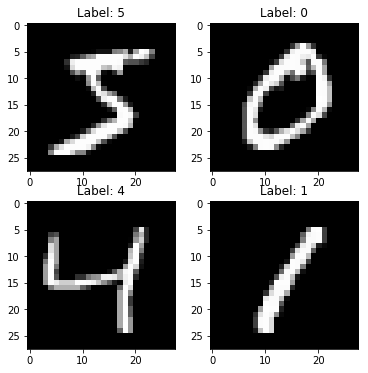

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

Without training we expect a random prediction, giving an accuracy of 10%

In [17]:
network = []
network.append(Dense(X_train.shape[1],100))
network.append(ReLU())
network.append(Dense(100,200))
network.append(ReLU())
network.append(Dense(200,10))
print(np.mean(predict(network,X_val)==y_val))

0.1204


Epoch 2
Train accuracy: 0.98868
Val accuracy: 0.9726


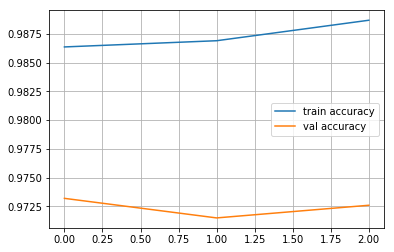

In [19]:
train_log = []
val_log = []

for epoch in range(3):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Additions

## Other activation functions
* Implement activation functions such as:
    * Tanh
    * LeakyReLU
    * Sigmoid



In [47]:
class LeakyReLU(Layer):
    def __init__(self, slope = 0.05):
        self.slope = slope
        pass
    
    def forward(self, input):
        return np.maximum(0,input) +self.slope * np.minimum(0,input)
    
    def backward(self, input, grad_output):
        relu_grad = 1.*(input > 0)+ self.slope*(input < 0)
        return grad_output*relu_grad        

In [48]:
class Sigmoid(Layer):
    def __init__(self):
        """sigmoid layer simply applies elementwise sigmoid to all inputs"""
        pass
    
    def forward(self, input):
        return 1. / (1. + np.exp(-input))
    def backward(self, input, grad_output):
        sigmoid_act = 1. / (1. + np.exp(-input))
        sigmoid_grad = sigmoid_act * (1. - sigmoid_act)
        return grad_output*sigmoid_grad      

In [49]:
class Tanh(Layer):
    def __init__(self):
        """Tanh layer simply applies elementwise sigmoid to all inputs"""
        pass
    
    def forward(self, input):
        return 2. / (1. + np.exp(-2.*input))-1.
    
    def backward(self, input, grad_output):
        sigmoid_2x = 1. / (1. + np.exp(-2.*input))
        tanh_grad = 4. * sigmoid_2x * (1. - sigmoid_2x)
        return grad_output*tanh_grad      

## Initialization
* Implement Dense layer with Xavier initialization as explained [here](http://bit.ly/2vTlmaJ)

Check the influence of the initialization building a deeper network (6 or more layers).

### LOADING NMIST

In [26]:
from sklearn.model_selection import train_test_split

In [38]:
loaded = np.load('NMIST_dataset.npz')
X = loaded['X']
X =  X.reshape((-1,X.shape[1]*X.shape[2]))
# IMPORTANT: CHECK WHAT HAPPENS IF WE DON'T SCALE
X = X/255.
y = loaded['Y']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_val,y_val,test_size=0.5)

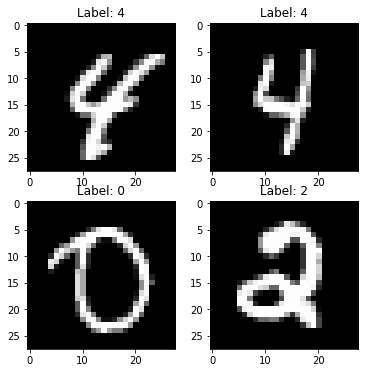

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

### Initialization test


First, we define a Dense layer with an additional parameter called initializer, which allows us to select the initialization option.

Bearing that in mind, we are going to define 3 identical 6 layer networks, but using differnet initializers:

-network2: The constant variance that was defined by default in the assignment.

-network3: The "XavierReLU" with variance=2/(input_units)

-network4: The "XavierReLUBoth" with variance=2*2/(input_units+output_units). This is the one originally proposed by Xavier and Bengio, but adding the 2 factor to take into account that we are using ReLU activation functions.

In [40]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1,initializer="XavierReLU"):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = <W*x> + b
        initializer="Xavier" implements Xavier initialization
        """
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. We use normal initialization, 
        # but surely there is something better. Try this once you got it working: http://bit.ly/2vTlmaJ
        if initializer.lower() == "XavierReLUBoth".lower():
            #For ReLU the variance has to be 2*2/(input_units+output_units)
            self.weights = np.random.randn(input_units, output_units)*np.sqrt(4./(input_units+output_units))
        elif initializer.lower() == "XavierReLU".lower():
            #For ReLU the variance has to be 2/input_units
            self.weights = np.random.randn(input_units, output_units)*np.sqrt(2./input_units)
        #elif initializer == "XavierSoftmax"
            #For Softmax we have an exponential with tangent at zero equal to 1. variance = 1/input_units
            #self.weights = np.random.randn(input_units, output_units)*np.sqrt(1./input_units)
        else:
            self.weights = np.random.randn(input_units, output_units)*0.01
                
        
        
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        return np.matmul(input,self.weights)+self.biases
    
    def backward(self,input,grad_output):
        
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.matmul(grad_output,self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.matmul(input.T,grad_output)
        grad_biases = np.sum(grad_output,axis=0)
        
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        # Here we perform a stochastic gradient descent step. 
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

In [41]:
#Deep network using the original initialization  var=(0.01)**2
initi="normal"
network2 = []
network2.append(Dense(X_train.shape[1],256,initializer=initi))
network2.append(ReLU())
network2.append(Dense(256,128,initializer=initi))
network2.append(ReLU())
network2.append(Dense(128,128,initializer=initi))
network2.append(ReLU())
network2.append(Dense(128,64,initializer=initi))
network2.append(ReLU())
network2.append(Dense(64,32,initializer=initi))
network2.append(ReLU())
network2.append(Dense(32,10,initializer=initi))

In [42]:
#Deep network using "XavierReLU"  var=2/(input_units)
initi="XavierRELU"
network3 = []
network3.append(Dense(X_train.shape[1],256,initializer=initi))
network3.append(ReLU())
network3.append(Dense(256,128,initializer=initi))
network3.append(ReLU())
network3.append(Dense(128,128,initializer=initi))
network3.append(ReLU())
network3.append(Dense(128,64,initializer=initi))
network3.append(ReLU())
network3.append(Dense(64,32,initializer=initi))
network3.append(ReLU())
network3.append(Dense(32,10,initializer=initi))

In [43]:
#Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
initi="XavierReLUBoth"
network4 = []
network4.append(Dense(X_train.shape[1],256,initializer=initi))
network4.append(ReLU())
network4.append(Dense(256,128,initializer=initi))
network4.append(ReLU())
network4.append(Dense(128,128,initializer=initi))
network4.append(ReLU())
network4.append(Dense(128,64,initializer=initi))
network4.append(ReLU())
network4.append(Dense(64,32,initializer=initi))
network4.append(ReLU())
network4.append(Dense(32,10,initializer=initi))

Epoch 4
Train accuracy: 0.11271428571428571
Val accuracy: 0.11247619047619048


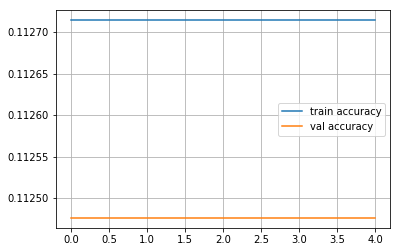

In [44]:
train_log2 = []
val_log2 = []
for epoch in range(5):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network2,x_batch,y_batch)
    
    train_log2.append(np.mean(predict(network2,X_train)==y_train))
    val_log2.append(np.mean(predict(network2,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log2[-1])
    print("Val accuracy:",val_log2[-1])
    plt.plot(train_log2,label='train accuracy')
    plt.plot(val_log2,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Epoch 4
Train accuracy: 0.9874693877551021
Val accuracy: 0.9721904761904762


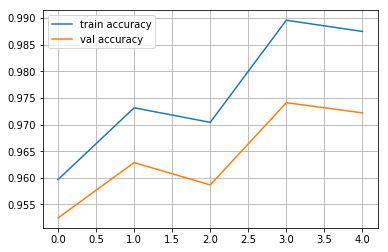

In [45]:
train_log3 = []
val_log3 = []
for epoch in range(5):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network3,x_batch,y_batch)
    
    train_log3.append(np.mean(predict(network3,X_train)==y_train))
    val_log3.append(np.mean(predict(network3,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log3[-1])
    print("Val accuracy:",val_log3[-1])
    plt.plot(train_log3,label='train accuracy')
    plt.plot(val_log3,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Epoch 4
Train accuracy: 0.9853877551020408
Val accuracy: 0.968


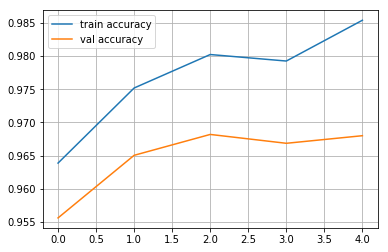

In [46]:
train_log4 = []
val_log4 = []
for epoch in range(5):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network4,x_batch,y_batch)
    
    train_log4.append(np.mean(predict(network4,X_train)==y_train))
    val_log4.append(np.mean(predict(network4,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log4[-1])
    print("Val accuracy:",val_log4[-1])
    plt.plot(train_log4,label='train accuracy')
    plt.plot(val_log4,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

### ANALYSIS 1

We can observe that using the predefined initializer suffers from vanishing gradient problems, since the results are static thorugh all the training process. This is due to the small variance of the weights when being initiazed, leading to them being too small and the backpropagation algorithm to be not efficient.

In the case of the two different Xavier initializers, both give the same results, since usually number_inputs and number_outputs are of the same order.

Let us perform another experiment, in which these two parameters are really different in at least one layer. Now they are going to be 5-layer networks.

In [137]:
#Deep network using the original initialization  var=(0.01)**2
initi="normal"
network2 = []
network2.append(Dense(X_train.shape[1],600,initializer=initi))
network2.append(ReLU())
network2.append(Dense(600,500,initializer=initi))
network2.append(ReLU())
network2.append(Dense(500,20,initializer=initi))
network2.append(ReLU())
network2.append(Dense(20,16,initializer=initi))
network2.append(ReLU())
network2.append(Dense(16,10,initializer=initi))

In [138]:
#Deep network using "XavierReLU"  var=2/(input_units)
initi="XavierRELU"
network3 = []
network3.append(Dense(X_train.shape[1],600,initializer=initi))
network3.append(ReLU())
network3.append(Dense(600,500,initializer=initi))
network3.append(ReLU())
network3.append(Dense(500,20,initializer=initi))
network3.append(ReLU())
network3.append(Dense(20,16,initializer=initi))
network3.append(ReLU())
network3.append(Dense(16,10,initializer=initi))

In [139]:
#Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
initi="XavierReLUBoth"
network4 = []
network4.append(Dense(X_train.shape[1],600,initializer=initi))
network4.append(ReLU())
network4.append(Dense(600,500,initializer=initi))
network4.append(ReLU())
network4.append(Dense(500,20,initializer=initi))
network4.append(ReLU())
network4.append(Dense(20,16,initializer=initi))
network4.append(ReLU())
network4.append(Dense(16,10,initializer=initi))

Epoch 19
Train accuracy: 0.99584
Val accuracy: 0.9748


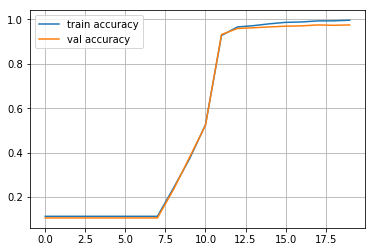

In [140]:
train_log2 = []
val_log2 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network2,x_batch,y_batch)
    
    train_log2.append(np.mean(predict(network2,X_train)==y_train))
    val_log2.append(np.mean(predict(network2,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log2[-1])
    print("Val accuracy:",val_log2[-1])
    plt.plot(train_log2,label='train accuracy')
    plt.plot(val_log2,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Epoch 19
Train accuracy: 1.0
Val accuracy: 0.9837


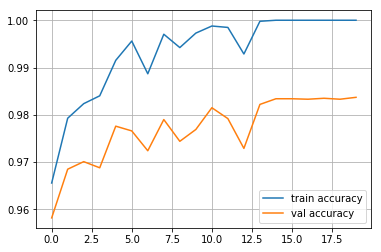

In [141]:
train_log3 = []
val_log3 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network3,x_batch,y_batch)
    
    train_log3.append(np.mean(predict(network3,X_train)==y_train))
    val_log3.append(np.mean(predict(network3,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log3[-1])
    print("Val accuracy:",val_log3[-1])
    plt.plot(train_log3,label='train accuracy')
    plt.plot(val_log3,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Epoch 19
Train accuracy: 1.0
Val accuracy: 0.9828


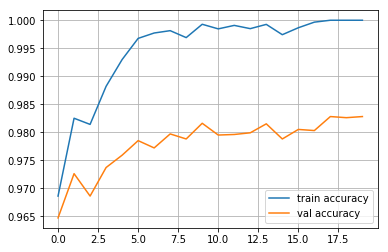

In [142]:
train_log4 = []
val_log4 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network4,x_batch,y_batch)
    
    train_log4.append(np.mean(predict(network4,X_train)==y_train))
    val_log4.append(np.mean(predict(network4,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log4[-1])
    print("Val accuracy:",val_log4[-1])
    plt.plot(train_log4,label='train accuracy')
    plt.plot(val_log4,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

### ANALYSIS 2

So, in that case network4("XavierReLUBoth") performs slightly better, and both Xavier initializers much better than the constant one. Even having one layer less, it suffers from vanishing gradient problem. 

We can conclude that weight initialization can have a great impact on the learning stage, and that Xavier initialization is a really nice option to cosider when deciding how to initialize our parameters.

## Regularization
* Implement a version of Dense layer with L2 regularization penalty: when updating Dense Layer weights, adjust gradients to minimize

$$ Loss = Crossentropy + \alpha \cdot \underset i \sum {w_i}^2 $$

Conduct an experiment showing if regularization mitigates overfitting in case of abundantly large number of neurons. Consider tuning $\alpha$ for better results.



## Optimization
* Implement a version of Dense layer that uses momentum/rmsprop or whatever method you find in the literature.

Most of those methods require persistent parameters like momentum direction or moving average grad norm, but you can easily store those params inside your layers.

Compare this optimization methods with the basic SGD.

## Batch normalization

As a bonus assignment (no points, just swag), consider implementing Batch Normalization ([guide](https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b)) .

Note, however, that those "layers" behave differently when training and when predicting on test set.
* Batch normalization
  * During training, it substracts mean-over-batch and divides by std-over-batch and updates mean and variance.
  * During final prediction, it uses accumulated mean and variance.
  

## Dropout

Implement Dropout ([guide](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)). 

Note, however, that those "layers" behave differently when training and when predicting on test set.

* Dropout:
  * During training: drop units randomly with probability __p__ and multiply everything by __1/(1-p)__
  * During final predicton: do nothing; pretend there's no dropout
  

# ENCODER TEST

In [ ]:
# %matplotlib notebook
from ipywidgets import interact
from sklearn.decomposition import PCA

In [85]:
network4 = pickle.load(open('network4.pickle', "rb"))

Epoch 19
Train accuracy: 0.989938775510204
Val accuracy: 0.9729523809523809


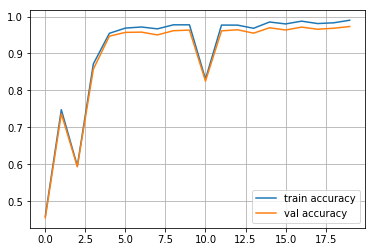

In [83]:
# #Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
# initi="XavierReLUBoth"
# network4 = []
# network4.append(Dense(X_train.shape[1],512,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(512,256,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(256,32,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(32,2,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(2,2,initializer=initi))
# network4.append(Tanh())
# network4.append(Dense(2,10,initializer=initi))


# train_log4 = []
# val_log4 = []
# for epoch in range(20):

#     for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
#         train(network4,x_batch,y_batch)
    
#     train_log4.append(np.mean(predict(network4,X_train)==y_train))
#     val_log4.append(np.mean(predict(network4,X_val)==y_val))
    
#     clear_output()
#     print("Epoch",epoch)
#     print("Train accuracy:",train_log4[-1])
#     print("Val accuracy:",val_log4[-1])
#     plt.plot(train_log4,label='train accuracy')
#     plt.plot(val_log4,label='val accuracy')
#     plt.legend(loc='best')
#     plt.grid()
#     plt.show()

In [ ]:
# import pickle
# with open('network4.pickle', "wb") as output_file:
#     pickle.dump(network4, output_file,pickle.HIGHEST_PROTOCOL)

In [89]:
(predict(network4,X_val)==y_val).mean()

0.9729523809523809

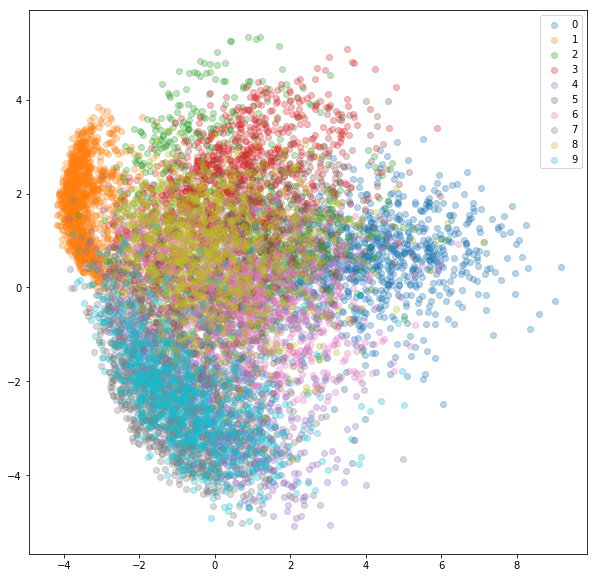

In [90]:
pca = PCA(n_components = 2)
X_test_PCA = pca.fit_transform(X_test)
fig = plt.figure(figsize=(10,10))
for i in range(10):
    plt.scatter(X_test_PCA[y_test==i,0],X_test_PCA[y_test==i,1],label = str(i),alpha=0.3)
plt.legend()

In [95]:
enc1 = forward(network4,X_test)[-2]
enc2 = forward(network4,X_test)[-3]
enc3 = forward(network4,X_test)[-4]
enc4 = forward(network4,X_test)[-5]
enc_list = [X_test_PCA,enc4,enc3,enc2,enc1]

@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list[step]
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.scatter(enc[y_test==i,0],enc[y_test==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

In [ ]:
network5 = pickle.load(open('network5.pickle', "rb"))

Epoch 8
Train accuracy: 0.8507346938775511
Val accuracy: 0.8429523809523809


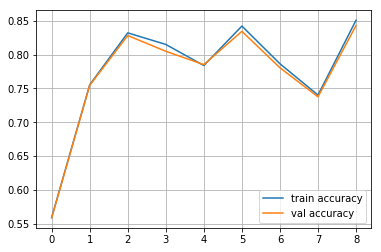

100%|██████████| 1531/1531 [00:15<00:00, 98.98it/s] 


In [ ]:
#Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
initi="XavierReLUBoth"
network5 = []
network5.append(Dense(X_train.shape[1],512,initializer=initi))
network5.append(Tanh())
network5.append(Dense(512,256,initializer=initi))
network5.append(Tanh())
network5.append(Dense(256,32,initializer=initi))
network5.append(Tanh())
network5.append(Dense(32,2,initializer=initi))
network5.append(Tanh())
network5.append(Dense(2,2,initializer=initi))
network5.append(Tanh())
network5.append(Dense(2,10,initializer=initi))


train_log5 = []
val_log5 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network5,x_batch,y_batch)
    
    train_log5.append(np.mean(predict(network5,X_train)==y_train))
    val_log5.append(np.mean(predict(network5,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log5[-1])
    print("Val accuracy:",val_log5[-1])
    plt.plot(train_log5,label='train accuracy')
    plt.plot(val_log5,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [ ]:
import pickle
with open('network5.pickle', "wb") as output_file:
    pickle.dump(network5, output_file,pickle.HIGHEST_PROTOCOL)

In [ ]:
enc1 = forward(network5,X_test)[-2]
enc2 = forward(network5,X_test)[-3]
enc3 = forward(network5,X_test)[-4]
enc4 = forward(network5,X_test)[-5]
enc_list2 = [X_test_PCA,enc4,enc3,enc2,enc1]
@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list2[step]
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.scatter(enc[y_test==i,0],enc[y_test==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None